## EDA & Feature Engineering on Black Friday Sales Data

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data sets
df_train = pd.read_csv('BlackFridaySales//sales_train.csv')
df_train.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
df_test = pd.read_csv('BlackFridaySales//sales_train.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#merge both data sets 
df = df_train.merge(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# Deleting User ID column as it is of no use 
df.drop(['User_ID'], axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
# Handling Categorical feature : Converting gender values to numerical - male : 1 and female : 0
df['Gender']=df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
# Handling Categorical feature: Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
#pd.get_dummies(df['Age'])
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [10]:
df['Age']=df['Age'].astype('Int64')

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [12]:
# Handling Categorical feature: City_Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [14]:
df['City_Category'] = df['City_Category'].map({'A':1, 'B':2, 'C':3})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969


In [15]:
#missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [16]:
df.shape

(550068, 11)

In [17]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [19]:
# As we can see that the data here in both columns is discrete continuous data so the best way to fill null values is with mode
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [20]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [22]:
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [23]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [24]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,3,4+,0,8,8.0,16.0,7969


In [26]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  Int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: Int64(1), float64(2), int64(6), object(2)
memory usage: 46.7+ MB


In [28]:
# converting Stay_In_Current_City_Years to integer 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

## Visualizations

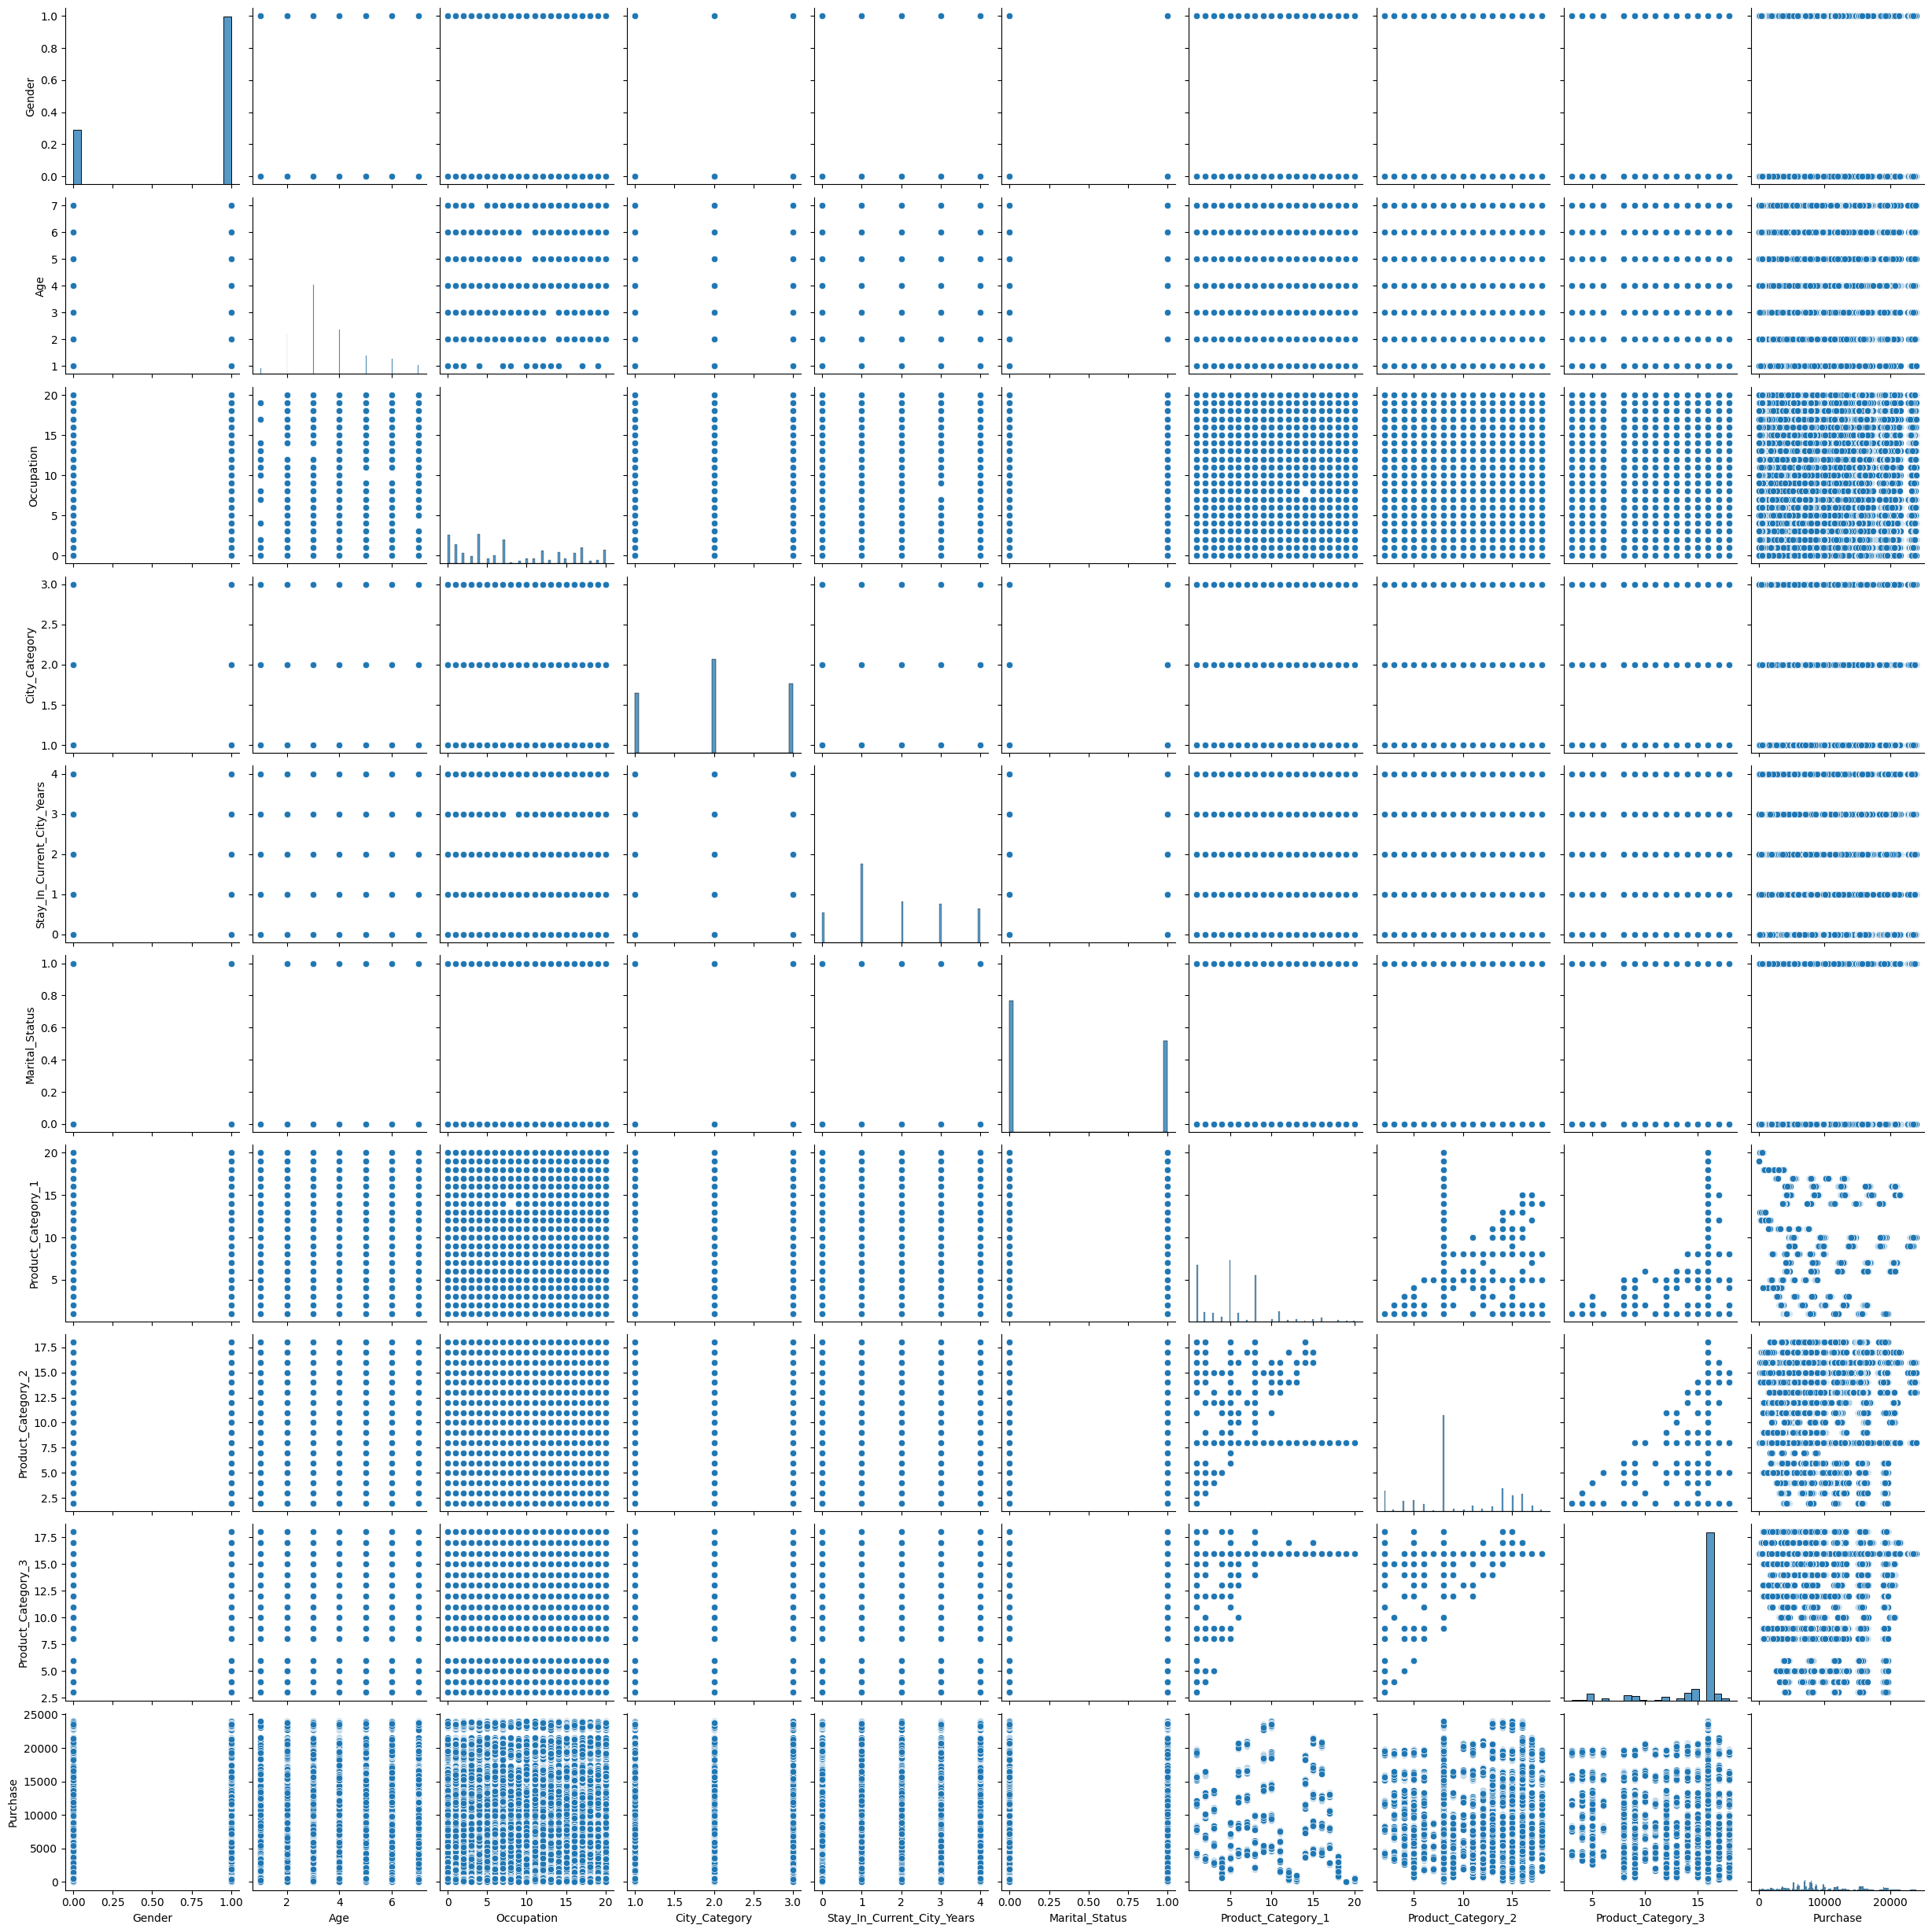

In [29]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

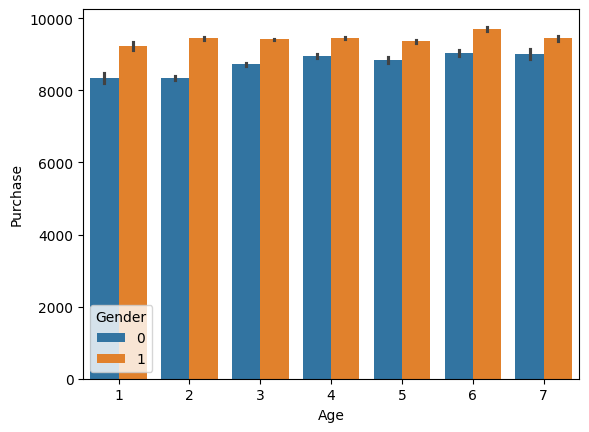

In [30]:
#barplot
sns.barplot(x=df['Age'], y=df['Purchase'], data=df, hue=df['Gender'])

### Observation: Men are purchasing more as compared to women.

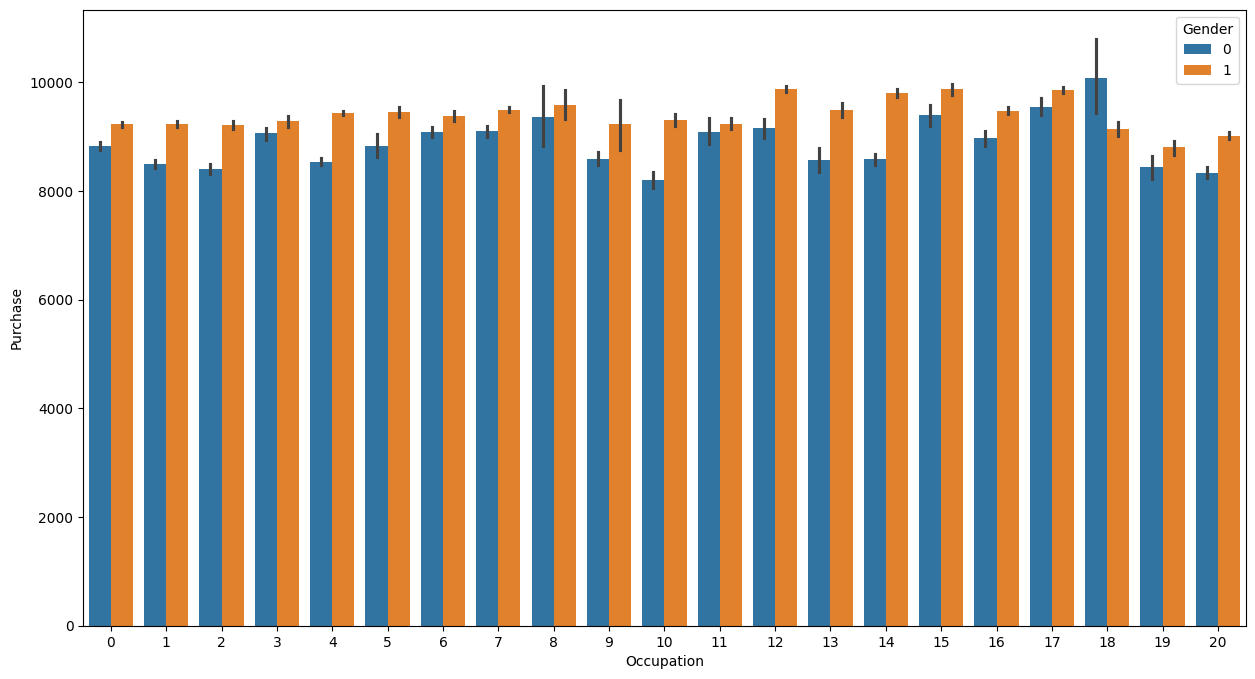

In [31]:
# Visualization of purchases done with respect to occupation
plt.figure(figsize=(15,8))
visual1 = sns.barplot(data=df, x=df['Occupation'], y=df['Purchase'], hue= df['Gender'])
plt.show(visual1)

In [32]:
#Feature Scalling
df_test = df[df['Purchase'].isnull()]

In [33]:
df_train = df[~df['Purchase'].isnull()]

In [34]:
from sklearn.model_selection import train_test_split
X=df_train.drop('Purchase', axis=1)
y=df_train['Purchase']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [35]:
X_train.drop('Product_ID', axis=1, inplace=True)
X_test.drop('Product_ID', axis=1, inplace=True)

In [36]:
#using standard scalar 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Next step: train Model